# Advanced Logistic Regression

In the previous sprint you became familiar with regression models. In particular, you were introduced to linear methods for regression, such as linear regression, ridge regression and lasso regression. In addition, you were introduced to a few non-linear methods for regression such as a regression tree and a random forest regressor. In regard to this, it is important to bear in mind that the response you are modelling is quantitative. This means that the response takes on numeric values. In the present sprint you will learn about methods for **classification**. The defining characteristic of a classification problem is due to the response being qualitative. A qualitative variable, equivalently called a categorical variable, is a variable for which there is a finite set of possible categories of classes that can be realised. The process of trying to predict a categorical response is called classification. In classification problems the training data is of the form

$$
\{(\underline{x}_{i}, g_{i}), i = 1, \cdots, N\}
$$

In the expression above $N$ denotes the number of observations in the dataset. $\underline{x}_{i}$ denotes an observation where the line under $x_{i}$ clarifies that the observation is a vector with multiple features. $g_{i}$ is the response we are trying to classify and is of the form

$$
g_{i} = \{0, 1, 2, \cdots, K-1\}
$$

where $K$ is the number of classes that the response can take on. If $K = 2$, then the classification problem is called **binary classification**. If $K > 2$, then the problem is called **multi-class classification**.

Let us consider an example to solidify our understanding of the concept of classification. Note that this example is completely fictitious and is only aimed at helping you understand the concept of classification. With that out of the way, on to the problem: Explore would like its current EDSA students (that's you) to build a model to be able to determine if a new student enrolling into the course in 2020 will be able to pass. For this purpose, Explore has provided you with a dataset. Each observation is of the form

$$
\underline{x}_{i} = (x_{i,1}, x_{i,2}, x_{i,3})
$$
where $x_{i,1} = $ age, $x_{i,2} = $ average mark in matric and $x_{i,3} = $ entrance exam score. We have $i = 1, \cdots, 200 $ which means that Explore has given you training data on 200 past students. The response corresponding to each observation is $1$ if the student passed and $0$ if the student failed. Hence,

$$
g_{i} = \{0, 1\}
$$

Since $K = 2$, we are dealing with a binary classification problem. Now our job is to train a model, let's denote the estimated model by $\hat{f}(\cdot)$. The purpose of our estimated model is to take, as input, a new student's attributes and produce, as output, an indicator which will inform Explore about whether the student is likely to pass in 2020. Let the attributes of a new student be denoted by the observation $\underline{x}_{0}$. Our estimated model should do something like

$$
    \hat{f}(\underline{x}_{0}) =\left\{
                \begin{array}{ll}
                  1 \ \text{if the student is likely to pass} \\
                  0 \ \text{if the student is unlikely to pass}
                \end{array}
              \right.
$$

Some classification models such as the support vector classifier do exactly this. Others, such as logistic regression do not output either a $0$ or a $1$. Instead, they give us a value between $0$ and $1$ which denotes the probability of a particular class being true. So for example, we might get something like $\hat{f}(\underline{x}_{0}) = 0.6$ as an output from the model. In this case we would need to assign the observation to the class that has the highest probability of occuring. So if the probability of a student passing is $0.6$, then it is more likely for the student to pass and therefore we would set the output to $\hat{y}_{i} = 1$ for this student. The notation $\hat{y}_{i}$ denotes our class prediction

In this train we will implement Logistic regression. Both of these methods are linear methods for classification. This means that the decision boundary is a $p$-dimensional plane. So, if $p = 1$, the decision boundary is a straight line, for example. The term decision boundary refers to how points are assigned to a particular class. In the example on classifying students above, we stated that we assign the student to the class that has the highest probability of occuring. This is equivalent to saying

$$
    \hat{y} =\left\{
                \begin{array}{ll}
                  1 \ \hat{f}(\underline{x}_{i}) > 0.5 \\
                  0 \ \hat{f}(\underline{x}_{i}) <= 0.5
                \end{array}
              \right.
$$

The value $0.5$ is called the **threshold**. It is something that we can specify depending on how willing we are to accept certain types of errors. We will explore this further in the notebook.

### Data description

For the purpose of this train we will use one of Sklearn's built-in dataset. The benefit of doing so is that the dataset is easy to access and does not require preprocessing. We will use the Wisconsin breast cancer dataset. The dataset consists of $569$ observations each with $30$ features. As a basis the features compose ten real-valued measurements that are computed for each cell nucleus, namely:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

Given this, the  mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed, resulting in a total of $30$ features.The response is a binary variable where $1$ indicates that the patient has breast cancer and $0$ indicates that the patient does not have breast cancer.

### Getting started 

First we import the libraries that we will need

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, log_loss

import warnings
warnings.filterwarnings("ignore")

In [2]:
X, y = load_breast_cancer(return_X_y=True)

### Logistic regression

The first model that we will discuss is logistic regression, a linear method for classification. Note that the name given to this model is a bit confusing since it has the word regression in it. To be clear, logistic regression is a classification model. Its connection to regression will become clear below. To simplify our discussion we will restrict our attention to binary classifcation. Recall from the discussion on linear regression that the form of a linear model for $p$ variables is

$$
y_{i} = \beta_{0} + \beta_{1}x_{i,1} + \cdots + \beta_{p}x_{i,p}, \ i = 1, \cdots, N
$$
Logistic regression uses a similar strategy. However, it does not model the response $y_{i}$ directly, rather it models a transformation of the response given by the formula

$$
\log \Bigg[\frac{P(Y = 1 \mid \underline{X} = \underline{x}_{i})}{P(Y = 0 \mid \underline{X} = \underline{x}_{i})}\Bigg] = \beta_{0} + \beta_{1}x_{i,1} + \cdots + \beta_{p}x_{i,p}, \ i = 1, \cdots, N
$$

where the expression $P(Y = k \mid \underline{X} = \underline{x}_{i})$ for $k = 0, 1$ and $i = 1, \cdots, N$ is the probability of the response being equal to one of the two possible categorical levels given that the input is equal to a particular observation. Given the expression above, it is possible to show that

$$
P(Y = 1 \mid \underline{X} = \underline{x}) = \frac{e^{\beta_{0} + \sum_{j = 1}^{p} \beta_{i}x_{i, j}}}{1 + e^{\beta_{0} + \sum_{j = 1}^{p} \beta_{i}x_{i, j}}}
$$

and

$$\label{1}
P(Y = 0 \mid \underline{X} = \underline{x}) = \frac{1}{1 + e^{\beta_{0} + \sum_{j = 1}^{p} \beta_{i}x_{i, j}}}
$$

You need not know how to get the expression above, but you should note that

$$
P(Y = 0 \mid \underline{X} = \underline{x}) + P(Y = 1 \mid \underline{X} = \underline{x}) = 1
$$

which means that we have a valid probability distribution over the binary categories. Given the discussion above, you should have an intuition as to why the word regression is used in logistic regression. Namely, that the model is a regression over a transformed version of the response. Now, you might be wondering why logistic is part of the name. Well, logistic references the logit transformation, which is given as

$$
\phi(z) = \frac{1}{1 + e^{-z}} = \frac{e^{z}}{1 + e^{z}}
$$
where
$$
z = \beta_{0} + \beta_{1}x_{i,1} + \cdots + \beta_{p}x_{i,p}, \ i = 1, \cdots, N
$$

Do you notice where we used this transformation? Hopefully, you can see that the logit function is exactly what is used to transform the response. Let's take a look at this function

In [3]:
def logit(z):
    return 1 / (1 + np.exp(-z))

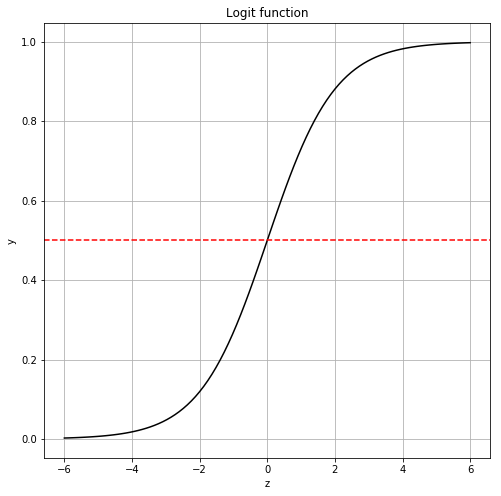

In [4]:
z = np.linspace(-6, 6, 100)
y_trans = logit(z)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(z, y_trans, c='black')
plt.title('Logit function')
plt.xlabel('z')
plt.ylabel('y')
plt.axhline(0.5, ls='--', c='red')
plt.grid()
plt.show()

Let's consider the plot above. For your convenience, a red line has been plotted at the point $y = 0.5$. Note that although we have specified $z$ to be in the range $[-6, 6]$, in practical applications $z = \beta_{0} + \sum_{j = 1}^{p} \beta_{i}x_{i, j}$. The curve is such that $y = \phi(z)$. So what does this mean? Well, if $z$ becomes large then the chance that it will be assigned to class label $1$ becomes greater. If $y = 0.5$ is the threshold, then every observation $x$ for which $z > 0$ will be assigned to class $1$. Furthermore, all $z < 0$ will be assigned to class $0$. The point of greatest uncertainty is when $z = 0$. For this event, we might just randomly assign $x$ to any class label. Typically, however, the condition $z < 0$ will be replaced by $z \leq 0$ and in doing so we will account for all possibilities.

### Loss functions

In the regression sprint you came across different loss function such as mean squared error or root mean log squared error. There are a number of different loss functions for classification too. Here we introduce the log-loss. Please refer to https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics to look at the complete list of possible loss functions available in Sklearn. The log loss is defined as  

$$
LL(y,\hat{y}) = -\log P(y|\hat{y}) = -(y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}))
$$

where $y$ is the true class label and $\hat{y}$ is what out model has predicted. Log loss measures the uncertainty in our models predictions. It does so by measuring how close the probability predictions of the model are to the true labels. Let us now fit a logistic regression model to our dataset. Luckily for us, fitting a classification model is done in exactly the same way as a regression model in Sklearn.

In [ ]:
# get training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# define the model 
logistic_reg = LogisticRegression(C=np.inf, solver='lbfgs')
# fit the model 
logistic_reg.fit(X_train, y_train)
# get predictions on the test set 
y_hat = logistic_reg.predict_proba(X_test)
# calculate the loss 
print("The log loss error for our model is: ", log_loss(y_test, y_hat))

The log loss error for our model is:  0.07550289995869602


Note that in the cell above we used the `predict_proba` function to return the class probabilities from the model. Another loss function is the accuracy score. This measures the extent to which the models predicted labels are correct.

In [ ]:
y_hat = logistic_reg.predict(X_test)
print("The accuracy for our model is: ", accuracy_score(y_test, y_hat))

The accuracy for our model is:  0.9707602339181286


What do you think is the reason for us setting the `C` parameter in the Logistic regression model to such a large value? By the way, `np.inf` is just a very big number. Well, the reason for setting `C` is because by default Sklearn implements a regularised version of the standard logistic regression model that we described above. This is not what we want and by setting the parameter as we have done, we get the result for the standard logistic model. Let's take a look at the predictions

In [ ]:
print(y_hat)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]


We can see from the above that the predictions are either $1$ or $0$. To get the probabilities that we discussed earlier we can use another method called `predict_prob`. 

In [ ]:
y_probs = logistic_reg.predict_proba(X_test)
print(y_probs)

[[3.26801592e-01 6.73198408e-01]
 [1.00000000e+00 4.55902638e-12]
 [9.99933188e-01 6.68120537e-05]
 [2.50335674e-03 9.97496643e-01]
 [1.38761440e-03 9.98612386e-01]
 [1.00000000e+00 3.87783406e-11]
 [1.00000000e+00 2.39544193e-15]
 [9.94022080e-01 5.97791974e-03]
 [7.35190326e-04 9.99264810e-01]
 [7.43643110e-03 9.92563569e-01]
 [6.00600508e-02 9.39939949e-01]
 [9.99965797e-01 3.42033073e-05]
 [5.66155290e-03 9.94338447e-01]
 [9.56646952e-01 4.33530477e-02]
 [1.90454890e-03 9.98095451e-01]
 [9.98704251e-01 1.29574878e-03]
 [1.53606249e-03 9.98463938e-01]
 [7.13711891e-04 9.99286288e-01]
 [1.45029252e-03 9.98549707e-01]
 [9.99999999e-01 5.13212505e-10]
 [2.11548873e-01 7.88451127e-01]
 [1.81324678e-02 9.81867532e-01]
 [1.00000000e+00 3.28288534e-13]
 [6.40494919e-03 9.93595051e-01]
 [1.10841336e-02 9.88915866e-01]
 [6.96715466e-04 9.99303285e-01]
 [1.61634998e-03 9.98383650e-01]
 [1.76220920e-02 9.82377908e-01]
 [8.01769031e-03 9.91982310e-01]
 [1.00000000e+00 1.70630113e-12]
 [8.504522

Lets take a look at one of the predictions a little closer. 

In [ ]:
print("Class label:", y_hat[0], "Class probabilities:", y_probs[0])

Class label: 1 Class probabilities: [0.32680159 0.67319841]


Do you see from the probabilities that the model predicted that the first testing observation had a probability of $0.21$ of being $0$ and a probability of $0.78$ of being $1$? Therefore, the fact that `y_hat[0] = 1` makes sense. The default behaviour in Sklearn is to assign all observations with a probability of more than $0.5$ to class $1$. Lets see what happens to our error if we adjust the threshold. For this we will consider a threshold of $0.3$.

In [ ]:
y_hat_star = np.where(y_probs[:,1] > 0.7, 1, 0)
print("The accuracy for our model is: ", accuracy_score(y_test, y_hat_star))

The accuracy for our model is:  0.9707602339181286


Do you notice that the accuracy of our model with a threshold of $0.7$ is better when compared to the default value of $0.5$? Now, we are not suggesting that you adjust the threshold in this manner to minimise the testing error. No, this would lead to overfitting. You could consider using cross-validation to find an optimal threshold. Or in some applications it is advisable to adjust the threshold to minimise the chance that you make certain types of errors. To look into this issue we will use another function in Sklearn called `classification_report`

In [ ]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

   micro avg       0.97      0.97      0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



We will not explain everything included in this table. Rather, we will concentrate on the precision and recall metrics. What do these refer to? You can look at https://en.wikipedia.org/wiki/Precision_and_recall for a more complete discussion but the figure in that text summarises the concept nicely

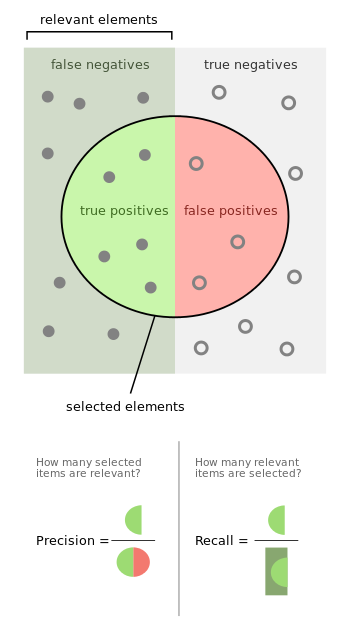

In the figure, a true positive is a class label of $1$ that is correctly identified as a $1$. A false positive is a incorrectly identified $1$ i.e. the model said that the class label is $1$ when in fact it was meant to be a $0$. Can you figure out what true negatives and false negatives are? Use the article or Google if you are unsure. Precision and recall are then just ratios of these quantities. Precision is the ratio of the number of observations that the model correctly identified as having label $1$ to the total number of observations that the model predicted as having a label of $1$. Recall is the ratio of the number of observations that the model correctly identified as having label $1$ to the total number of observations with the label  $1$.

Now, let us think about what the relation of the threshold is to precision and recall. In some application we may want to limit the number of false positives that we incur. For example, when using our model to predict whether students will pass in 2020, we might want to err on the side of caution when admitting new students. In this case it is probably worse to admit a student that ends up failing as opposed to rejecting a student that could have passed. Please remember this is just a made up example. We don't actually do this. Anyhow, if this was our aim then we would could achieve it by increasing our threshold. In doing so we would improve our precision.

In terms of our data set we would want the opposite. It would be better to tell a patient that they have breast cancer when in fact they don't. This will afford the patient the opportunity to go through further assessments. Given this, let's try a threshold of $0.3$

In [ ]:
y_thresh = np.where(y_probs[:,1] > 0.3, 1, 0)
print(classification_report(y_test, y_thresh))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

   micro avg       0.97      0.97      0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



Do you notice that the precision is now $0.96$ as opposed to $0.98$? This implies that we are predicting a class label of $1$ less accurately. This is expected since with a threshold of $0.3$ we are more likely to predict $1$. Let's look at the accuracy with this threshold

In [ ]:
accuracy_score(y_test, y_thresh)

0.9707602339181286

Unfortunately, we have caused the overall accuracy of our model to decrease. This is to be expected because as we suggested, we were more willing to incorrectly classify a few observations with a label $1$ when in fact they are $0$. Lets visualise these decision boundaries.

In [ ]:
def plot(i, j):
    # select arbitrary features. you can changes this but make sure
    # the indices fall within the range of the matrix columns
    logistic_reg.fit(X[:, [i, j]], y)
    fig = plt.figure(figsize=(15, 8))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    # create a meshgrid to colour all points on the left or right of the decision boundary 
    x_min, x_max = X[:, i].min(), X[:, i].max()
    y_min, y_max = X[:, j].min(), X[:, j].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
    # get predictions for each point in the meshgrid. This means each point will have either a 1 
    # or 0 as its label so that we can color the points using the labels 
    y_hat = logistic_reg.predict(np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)), axis=1))
    y_probs = logistic_reg.predict_proba(np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)), axis=1))
    y_hat = y_hat.reshape(xx.shape)

    # plot the meshgrid using the labels 
    ax1.pcolormesh(xx, yy, y_hat, cmap=plt.cm.get_cmap('RdBu_r'))
    ax1.scatter(X[:, i], X[:, j], c=y, edgecolors='k', cmap=plt.cm.get_cmap('RdBu_r'))
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_xlim(xx.min(), xx.max())
    ax1.set_ylim(yy.min(), yy.max())
    ax1.set_xticks(())
    ax1.set_yticks(())

    y_hat_shifted = np.where(y_probs[:,1] > 0.3, 1, 0)
    y_hat_shifted = y_hat_shifted.reshape(xx.shape)
    ax2.pcolormesh(xx, yy, y_hat_shifted, cmap=plt.cm.get_cmap('RdBu_r'))
    ax2.scatter(X[:, i], X[:, j], c=y, edgecolors='k', cmap=plt.cm.get_cmap('RdBu_r'))
    ax2.set_xlabel('Feature 1')
    ax2.set_ylabel('Feature 2')
    ax2.set_xlim(xx.min(), xx.max())
    ax2.set_ylim(yy.min(), yy.max())
    ax2.set_xticks(())
    ax2.set_yticks(())
    plt.show()

In [ ]:
plot(1,2) # you can play around here. adjust the input to the function to see different features plotted againt one another